<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Jul 16 06:07 .
drwxr-xr-x 1 root root 4096 Jul 16 05:55 ..
drwxr-xr-x 1 root root 4096 Jul 13 16:14 .config
-rw-r--r-- 1 root root 2777 Jul 16 06:36 iris.csv
drwxr-xr-x 1 root root 4096 Jul 10 16:29 sample_data


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# iris["feature_names"]
# iris["data"]
df = pd.DataFrame(iris["data"],
                  columns = iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv",encoding="utf-8",index=False)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split
#[90% data, 10% data, 90% target, 10% target]
x_train,x_test, y_train, y_test=train_test_split(iris["data"],
                                                   iris["target"],
                                                    test_size=0.1)


In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

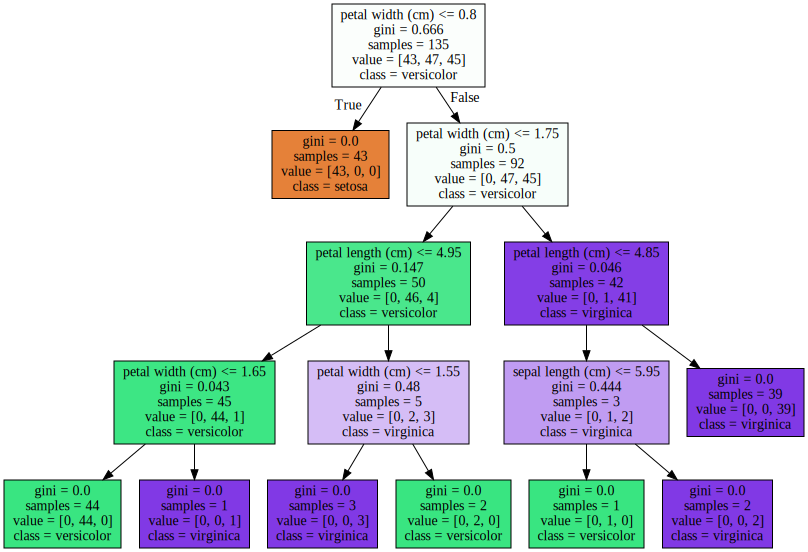

In [5]:
import graphviz
from sklearn.tree import  export_graphviz
g = export_graphviz(clf,
                feature_names = iris["feature_names"],
                class_names = iris["target_names"],
                filled=True)
graphviz.Source(g)

In [6]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333